In [81]:
import torch
import numpy
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [82]:
def f(x):
  return 1/(1+25*(x**2))

class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, Y, device, dtype = torch.float32):
        self._X = torch.tensor(X, device = device, dtype = dtype).reshape(-1, 1)
        self._Y = torch.tensor(Y, device = device, dtype = dtype).reshape(-1, 1)
    def __len__(self):
        return len(self._X)
    def __getitem__(self, idx):
        return self._X[idx], self._Y[idx]

In [83]:
X_train=torch.linspace(-1,1,1000)
Y_train=f(X_train)
X_test=torch.linspace(-1,1,200)
Y_test=f(X_test)
train_ds = Dataset(X_train, Y_train, device)
test_ds = Dataset(X_test, Y_test, device)

/tmp/ipython-input-1389271390.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._X = torch.tensor(X, device = device, dtype = dtype).reshape(-1, 1)
/tmp/ipython-input-1389271390.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._Y = torch.tensor(Y, device = device, dtype = dtype).reshape(-1, 1)


In [84]:
import torch.nn as nn
import torch.nn.functional

class YourModel(torch.nn.Module):
    def __init__(self, device, dtype = torch.float32):
        super().__init__()
        self.W = torch.nn.Linear(1, 7, device=device, dtype=dtype)
        self.T = torch.nn.Tanh()
        self.U = torch.nn.Linear(7, 7, device=device, dtype=dtype)
        self.G = torch.nn.Tanh()
        self.V = torch.nn.Linear(7, 1, device=device, dtype=dtype)



    def forward(self, _x):
        _w = self.W(_x)
        _t = self.T(_w)
        _u = self.U(_t)
        _g = self.G(_u)
        _y = self.V(_g)
        return _y

In [85]:
model=YourModel(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
n_epoch = 2000
losses = []

for i in range(n_epoch):
  optimizer.zero_grad()
  _y_prediction = model(train_ds._X)
  loss = criterion.forward(_y_prediction, train_ds._Y)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  print('epoch', i, loss.item()) if i % 100 == 0 else None

epoch 0 0.2127791792154312
epoch 100 0.009440827183425426
epoch 200 0.00021303539688233286
epoch 300 5.832397800986655e-05
epoch 400 4.9575748562347144e-05
epoch 500 4.2603613110259175e-05
epoch 600 3.6805849958909675e-05
epoch 700 3.204568201908842e-05
epoch 800 2.8122203730163164e-05
epoch 900 2.483232310623862e-05
epoch 1000 2.2002286641509272e-05
epoch 1100 1.949930447153747e-05
epoch 1200 1.72322106664069e-05
epoch 1300 1.5144861208682414e-05
epoch 1400 1.3208460586611181e-05
epoch 1500 1.1412279491196387e-05
epoch 1600 9.756869076227304e-06
epoch 1700 8.24798917165026e-06
epoch 1800 6.892362762300763e-06
epoch 1900 5.694505034625763e-06


In [86]:
_y_outcomeprediction = model(test_ds._X)
loss = criterion.forward(_y_outcomeprediction, test_ds._Y)
print('test loss', loss.item())

test loss 4.6671989366586786e-06


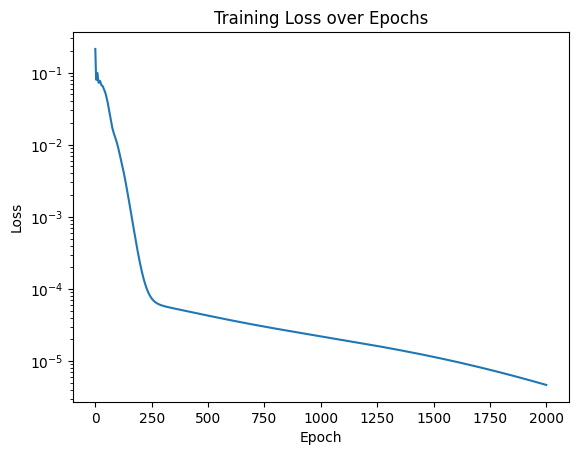

In [87]:
plt.plot(range(n_epoch), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.yscale('log')
plt.show()

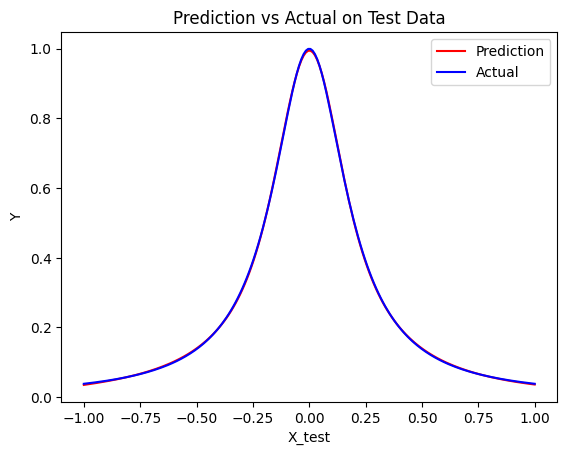

In [88]:
plt.plot(test_ds._X.cpu().numpy(), _y_outcomeprediction.cpu().detach().numpy(), label='Prediction', color='red')
plt.plot(test_ds._X.cpu().numpy(), test_ds._Y.cpu().numpy(), label='Actual', color='blue')
plt.xlabel('X_test')
plt.ylabel('Y')
plt.title('Prediction vs Actual on Test Data')
plt.legend()
plt.show()